# Residual Demand Model

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from rivapy.sample_data import residual_demand_models
from rivapy.tools.datetime_grid import DateTimeGrid

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [103]:
residual_demand_model = residual_demand_models.WagnerModel.residual_demand_model()

In [96]:
dg = DateTimeGrid(start=dt.datetime(2022, 1, 1), end=dt.datetime(2022,2,1), freq='1H')
n_sims = 5000

/home/doeltz/doeltz/development/RiVaPy/rivapy/tools/datetime_grid.py:16: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  self.timegrid = np.array([(d-self.start).total_seconds()/pd.Timedelta('1Y').total_seconds() for d in self.dates])


In [104]:
result = residual_demand_model.simulate(dg, 
                                start_value_wind = 0.5,
                                start_value_solar = 0.5,
                                start_value_load = 0.0,
                                n_sims = n_sims)

In [105]:
residual = result['load'] - result['solar'] - result['wind']

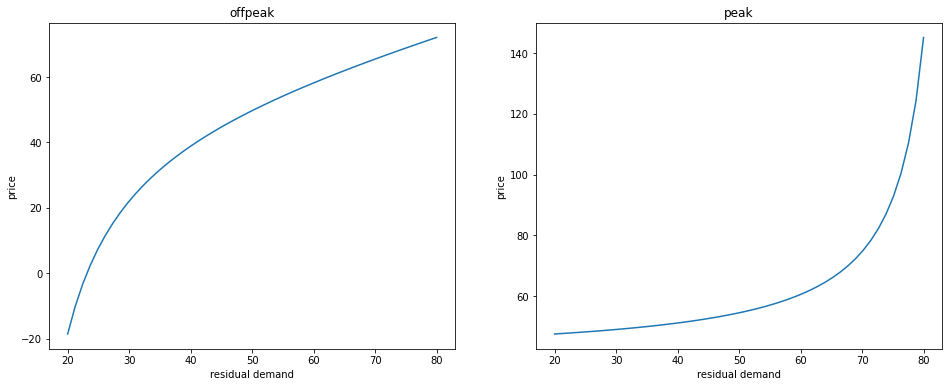

In [106]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('offpeak')
residual_demand_model.supply_curve.plot(dt.datetime(2022, 1, 1), 20, 80)
plt.subplot(1,2,2)
plt.title('peak')
residual_demand_model.supply_curve.plot(dt.datetime(2022, 1, 1, 12,0), 20, 80)

## Erwartungswert load, residual demand and price

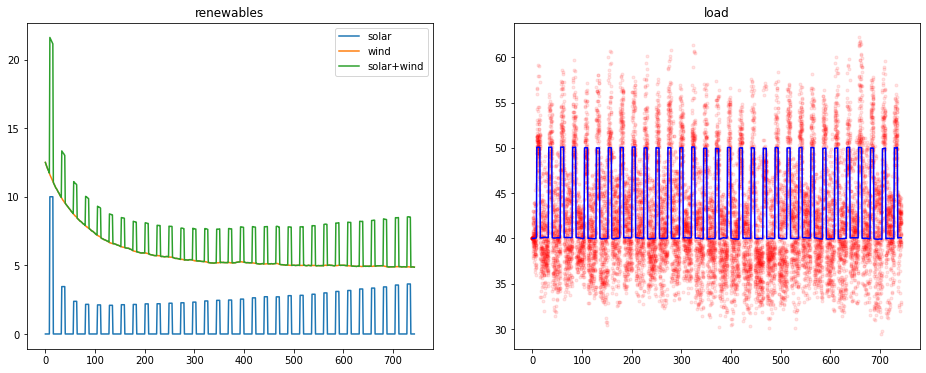

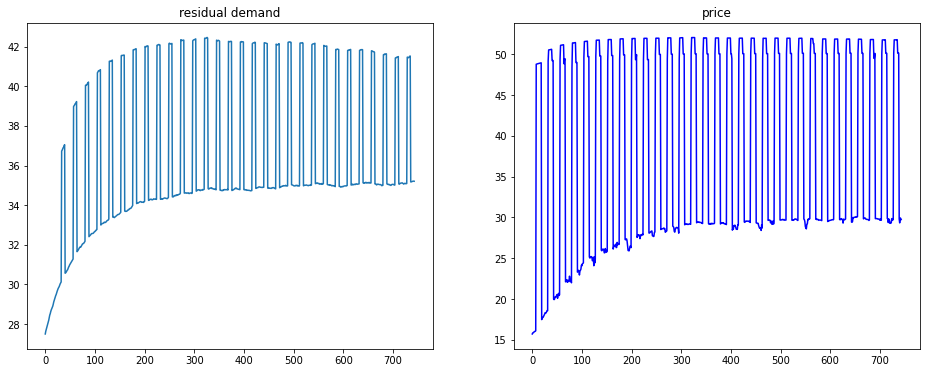

In [108]:
plt.figure(figsize=(16,6))


plt.subplot(1,2,1)
plt.plot(result['solar'].mean(axis=1),'-', label='solar')
plt.plot(result['wind'].mean(axis=1),'-', label='wind')
plt.plot(result['solar'].mean(axis=1) + result['wind'].mean(axis=1),'-', label='solar+wind')
plt.legend()
plt.title('renewables')

plt.subplot(1,2,2)
for i in range(20):
    plt.plot(result['load'][:,i], '.r', alpha=0.1)
plt.plot(result['load'].mean(axis=1),'-b')
plt.title('load')


plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(residual.mean(axis=1))
plt.title('residual demand')
plt.subplot(1,2,2)
#for i in range(20):
#    plt.plot(result['price'][:,i], '.r', alpha=0.1)
plt.plot(result['price'].mean(axis=1),'-b')
plt.title('price');

In [110]:
dt.datetime(2020,2,29)-dt.datetime(2020,2,29)

ValueError: day is out of range for month